**Computer vision libraries in PyTorch**
->torchvision
->torchvision.datasets
->torchvision.models
->torchvision.transforms
->torch.utils.data.Datasets
->torch.utils.data.DataLoader

In [1]:
import torch
from torch import nn

#import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

#import matplotlib for visualization
import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.4.1
0.19.1


In [2]:
train_data=datasets.FashionMNIST(
    root='data', #where to download data to?
    train=True, #whether to download the training or testing datasets?
    download=True, #whether to download or not?
    transform=ToTensor(), #how do we want to transform the data?, we can also write this as,'torchvision.transforms.ToTensor()'
    target_transform=None #how do we want to transform the labels/targets?
)
test_data=datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
image, label=train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names=train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx=train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
image.shape,label #C-color channel,H-height,W-width, and label is just an integer so don't have shape

(torch.Size([1, 28, 28]), 9)

Image Shape:torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

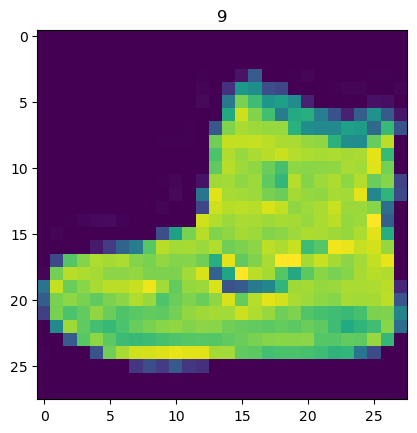

In [8]:
image, label=train_data[0]
print(f'Image Shape:{image.shape}')
plt.imshow(image.squeeze())
plt.title(label)
#image

(-0.5, 27.5, 27.5, -0.5)

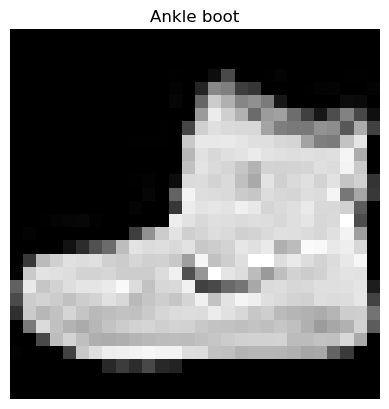

In [9]:
plt.imshow(image.squeeze(), cmap='gray') #american english, not british english, in case of 'gray'
plt.title(class_names[label])
plt.axis(False)

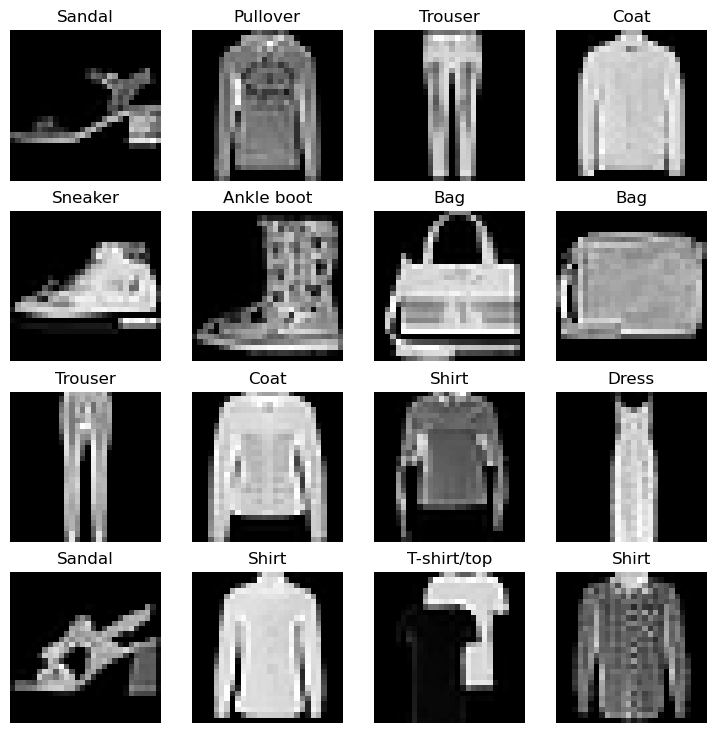

In [10]:
torch.manual_seed(1234)
fig=plt.figure(figsize=(9,9))
rows, cols=4,4
for i in range(1, rows*cols+1):
    random_idx=torch.randint(0, len(train_data), size=[1]).item()
    img, label=train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(class_names[label])
    plt.axis(False)

In [11]:
from torch.utils.data import DataLoader
BATCH_SIZE=32
train_dataloader=DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader=DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=False)
print(f'DataLoaders: {train_dataloader, test_dataloader}')

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x15a6ab5d0>, <torch.utils.data.dataloader.DataLoader object at 0x15a78ea10>)


In [12]:
print(f'Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}')
print(f'Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}')

Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [13]:
train_features_batch, train_labels_batch=next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 3, label size: torch.Size([])


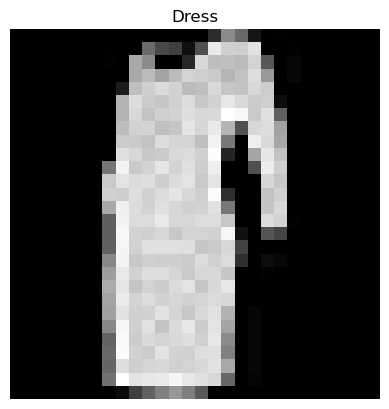

In [14]:
torch.manual_seed(1234)
random_idx=torch.randint(0, len(train_features_batch), size=[1]).item()
img, label=train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis('off')
print(f'Image size: {img.shape}')
print(f'Label: {label}, label size: {label.shape}')

In [15]:
flatten_model=nn.Flatten()
x=train_features_batch[0]
output=flatten_model(x)
print(f'Shape before flattening: {x.shape}')
print(f'Shape after flattening: {output.shape}')

Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


In [16]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack=nn.Sequential(nn.Flatten(), 
                                       nn.Linear(in_features=input_shape, out_features=hidden_units), 
                                       nn.Linear(in_features=hidden_units, out_features=output_shape))

    def forward(self, x):
        return self.layer_stack(x)

In [17]:
torch.manual_seed(1234)
model_0=FashionMNISTModelV0(
    input_shape=784,
    hidden_units=10,
    output_shape=len(class_names)) #one for every class
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [18]:
dummy_x=torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.4084,  0.6092,  0.1417, -0.1481, -0.4164,  0.1216,  0.2520,  0.0052,
          0.0514,  0.1300]], grad_fn=<AddmmBackward0>)

In [19]:
from helper_functions import accuracy_fn
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.1)

In [20]:
from timeit import default_timer as timer
def print_training_time(start: float, end: float, device: torch.device=None):
    total_time=end-start
    print(f'Training time on device: {device}:{total_time:.3f} seconds')
    return total_time

In [21]:
start_time=timer()
#some code...
end_time=timer()
print_training_time(start=start_time, end=end_time)

Training time on device: None:0.000 seconds


9.082956239581108e-06

**Model with linear layer**

In [22]:
from tqdm.auto import tqdm
torch.manual_seed(1234)
train_time_start=timer()
epochs=5
for epoch in tqdm(range(epochs)):
    print(f'Epoch:{epoch}\n')
    train_loss=0
    for batch, (X,y) in enumerate(train_dataloader):
        model_0.train()
        y_pred=model_0(X) #forward pass
        loss=loss_fn(y_pred,y) #calculate loss per batch
        train_loss+=loss #accumulate train loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch%400==0:
            print(f'Looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples.')
    train_loss/=len(train_dataloader) #divide total train loss by length of train dataloader
    test_loss, test_acc=0,0
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            test_pred=model_0(X_test) #forward pass
            test_loss+=loss_fn(test_pred, y_test) #calculate loss accumulatively
            test_acc+=accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1)) #calculate accuracy
        test_loss/=len(test_dataloader) #calculate the test loss avg per batch
        test_acc/=len(test_dataloader) #calculate the test acc avg per batch
    print(f'\nTrain loss:{train_loss:.4f} | Test loss:{test_loss:.4f}, Test acc:{test_acc:.4f}')
train_time_end=timer()
total_train_time_model_0=print_training_time(start=train_time_start, end=train_time_end, 
                                             device=str(next(model_0.parameters()).device))

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch:0

Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss:0.5900 | Test loss:0.5734, Test acc:80.3215
Epoch:1

Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss:0.4759 | Test loss:0.4914, Test acc:82.5879
Epoch:2

Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss:0.4553 | Test loss:0.4928, Test acc:82.7077
Epoch:3

Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss:0.4427 | Test loss:0.4961, Test acc:82.5379
Epoch:4

Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked 

In [23]:
torch.manual_seed(1234)
def eval_model(model:torch.nn.Module, data_loader:torch.utils.data.DataLoader, loss_fn:torch.nn.Module, accuracy_fn):
    loss, acc=0,0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            y_pred=model(X)
            loss+=loss_fn(y_pred, y)
            acc+=accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
        loss/=len(data_loader)
        acc/=len(data_loader)
    return {'model_name':model.__class__.__name__, 'model_loss':loss.item(), 'model_acc':acc} #only works when model was created with a class
model_0_results=eval_model(model=model_0, data_loader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn)
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4502766728401184,
 'model_acc': 84.32507987220447}

In [24]:
from tqdm.auto import tqdm
import torch
from timeit import default_timer as timer

torch.manual_seed(1234)

# Start training timer
start_training_time = timer()

epochs = 5

for epoch in tqdm(range(epochs)):
    print(f'Epoch: {epoch+1}\n')
    training_loss = 0

    model_0.train()  # Set the model to training mode
    for batch, (X, y) in enumerate(train_dataloader):
        # Forward pass
        y_logits = model_0(X)
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
        loss = loss_fn(y_logits, y)
        training_loss += loss.item()
        acc = accuracy_fn(y_true=y, y_pred=y_pred)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print progress every 400 batches
        if batch % 400 == 0:
            print(f'Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.')

    # Average training loss
    training_loss /= len(train_dataloader)

    # Evaluation mode
    test_loss, test_acc = 0, 0
    model_0.eval()  # Set the model to evaluation mode

    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            # Forward pass
            test_logits = model_0(X_test)
            test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
            test_loss += loss_fn(test_logits, y_test).item()  # Calculate loss
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred)  # Calculate accuracy

    # Average test loss and accuracy
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

    print(f'\nTrain loss: {training_loss:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}')

# End training timer
end_training_time = timer()

# Print total training time
total_training_time = print_training_time(start=start_training_time, end=end_training_time, device=str(next(model_0.parameters()).device))

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1

Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4300 | Test loss: 0.4998 | Test acc: 82.1885
Epoch: 2

Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4256 | Test loss: 0.4749 | Test acc: 83.2568
Epoch: 3

Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4228 | Test loss: 0.4805 | Test acc: 83.2967
Epoch: 4

Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4187 | Test loss: 0.4898 | Test acc: 82.8474
Epoch: 5

Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/6

**Model with non-linear layer**

In [25]:
from torch import nn
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack=nn.Sequential(nn.Flatten(), 
                                       nn.Linear(in_features=input_shape, out_features=hidden_units), 
                                       nn.ReLU(), 
                                       nn.Linear(in_features=hidden_units, out_features=output_shape), 
                                       nn.ReLU())

    def forward(self, x:torch.Tensor):
        return self.layer_stack(x)

In [26]:
torch.manual_seed(1234)
model_1=FashionMNISTModelV1(
    input_shape=784,
    hidden_units=10,
    output_shape=len(class_names)) #one for every class
model_1

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [27]:
from helper_functions import accuracy_fn
loss_fn=nn.CrossEntropyLoss() #measure how wrong our model is
optimizer=torch.optim.SGD(params=model_1.parameters(),lr=0.1) #tries to update our model's parameters to reduce the loss

In [28]:
def train_step(model:torch.nn.Module, data_loader:torch.utils.data.DataLoader, loss_fn:torch.nn.Module, 
              optimizer:torch.optim.Optimizer, accuracy_fn):
    #performs a training with model trying to learn on data_loader
    train_loss, train_acc=0,0
    model.train()
    for batch, (X,y) in enumerate(data_loader):
        y_pred=model(X) #forward pass(outputs the raw logits from the model)
        loss=loss_fn(y_pred, y) #calculate loss
        train_loss+=loss #accumulate train loss
        train_acc+=accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1)) #go from logits to prediction labels
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    train_loss/=len(data_loader)
    train_acc/=len(data_loader)
    print(f'Train_loss:{train_loss:.4f} | Train_acc:{train_acc:.4f}')

In [29]:
def test_step(model:torch.nn.Module, data_loader:torch.utils.data.DataLoader, loss_fn:torch.nn.Module, accuracy_fn):
    #performs a testing loop on model going over data_loader
    test_loss, test_acc=0,0
    model.eval()
    with torch.inference_mode():
        for X,y in data_loader:
            test_pred=model(X) #forward pass(outputs the raw logits)
            test_loss=loss_fn(test_pred, y) #calculate loss
            test_acc+=accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1)) #go from logits to prediction labels
        test_loss/=len(data_loader)
        test_acc/=len(data_loader)
        print(f'Test_loss:{test_loss:.4f} | Test_acc:{test_acc:.4f}')

In [30]:
torch.manual_seed(1234)
from timeit import default_timer as timer
train_time_start=timer()
epochs=5
for epoch in tqdm(range(epochs)):
    print(f'Epoch:{epoch}\n')
    train_step(model=model_1, data_loader=train_dataloader, loss_fn=loss_fn, optimizer=optimizer, 
               accuracy_fn=accuracy_fn)
    test_step(model=model_1, data_loader=train_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn)
train_time_end=timer()
total_train_time_model_1=print_training_time(start=train_time_start, end=train_time_end, 
                                             device=str(next(model_1.parameters()).device))

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch:0

Train_loss:1.4010 | Train_acc:54.9017
Test_loss:0.0008 | Test_acc:57.1067
Epoch:1

Train_loss:1.1268 | Train_acc:60.4450
Test_loss:0.0006 | Test_acc:61.0767
Epoch:2

Train_loss:1.0763 | Train_acc:61.1717
Test_loss:0.0005 | Test_acc:61.0267
Epoch:3

Train_loss:0.9552 | Train_acc:66.2533
Test_loss:0.0005 | Test_acc:70.3000
Epoch:4

Train_loss:0.8666 | Train_acc:69.5567
Test_loss:0.0004 | Test_acc:70.6317
Training time on device: cpu:13.759 seconds


In [31]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4502766728401184,
 'model_acc': 84.32507987220447}

In [32]:
total_training_time

8.605017459020019

In [33]:
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.8926053047180176,
 'model_acc': 69.53873801916933}

**Model with CNN(convolutional neural network)**

In [34]:
class FashionMNISTModelV2(nn.Module):
    #model architecture that replicates the TinyVGG
    def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
        super().__init__()
        self.conv_block_1=nn.Sequential(nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, 
                                                 kernel_size=3, stride=1, padding=1), 
                                       nn.ReLU(), 
                                       nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, 
                                                 kernel_size=3, stride=1, padding=1), 
                                       nn.ReLU(), 
                                       nn.MaxPool2d(kernel_size=2))
        self.conv_block_2=nn.Sequential(nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, 
                                                 kernel_size=3, stride=1, padding=1), 
                                       nn.ReLU(), 
                                       nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, 
                                                 kernel_size=3, stride=1, padding=1), 
                                       nn.ReLU(), 
                                       nn.MaxPool2d(kernel_size=2))
        self.classifier=nn.Sequential(nn.Flatten(), 
                                      nn.Linear(in_features=hidden_units*7*7, #there's a trick daniel will explain
                                                out_features=output_shape))
    def forward(self,x):
        x=self.conv_block_1(x)
        #print(x.shape)
        x=self.conv_block_2(x)
        #print(x.shape)
        x=self.classifier(x)
        return x

In [35]:
torch.manual_seed(1234)
model_2=FashionMNISTModelV2(input_shape=1, hidden_units=10, output_shape=len(class_names))
model_2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

(-0.5, 27.5, 27.5, -0.5)

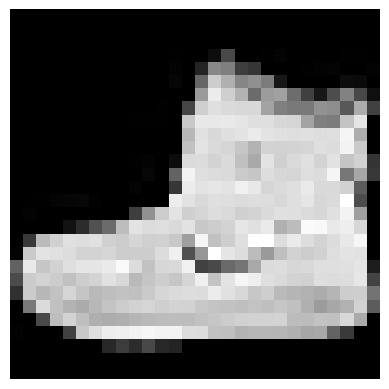

In [36]:
plt.imshow(image.squeeze(), cmap='gray')
plt.axis('off')

In [37]:
image.unsqueeze(dim=0).shape

torch.Size([1, 1, 28, 28])

In [38]:
model_2(image.unsqueeze(dim=0))

tensor([[-0.0280,  0.0246, -0.0189, -0.0556, -0.0308, -0.0211,  0.0098,  0.0043,
          0.0174, -0.0838]], grad_fn=<AddmmBackward0>)

In [39]:
torch.manual_seed(1234)
images=torch.randn(size=(32,3,64,64))
test_image=images[0]
print(f'Image batch shape:{images.shape}')
print(f'Single image shape:{test_image.shape}')
print(f'Test image:\n{test_image}')

Image batch shape:torch.Size([32, 3, 64, 64])
Single image shape:torch.Size([3, 64, 64])
Test image:
tensor([[[-0.1117, -0.4966,  0.1631,  ..., -1.6593, -1.8773,  0.7372],
         [ 0.9257,  0.9247,  0.1825,  ..., -0.5844,  0.9078,  0.4848],
         [-0.2632, -0.5432, -1.6406,  ...,  2.1073, -0.9930,  1.4080],
         ...,
         [-1.2882,  1.3667,  0.1176,  ...,  0.1048, -1.2838,  0.6126],
         [ 1.0059, -0.3565,  0.5539,  ...,  1.5078, -1.5628, -0.9581],
         [-0.2183, -0.9857, -0.8322,  ..., -0.8967, -2.1722, -0.2754]],

        [[-0.3995, -2.3781, -0.2138,  ...,  0.6864, -0.4147, -1.8372],
         [-0.2968,  1.0533,  0.0658,  ...,  0.5428, -0.2005,  0.5035],
         [-0.3947, -0.4847, -1.0050,  ...,  1.7296,  0.2928, -0.4058],
         ...,
         [-2.0651,  0.3616, -0.1097,  ..., -0.2110, -0.5649,  0.9911],
         [ 1.1922, -0.7091,  1.3794,  ...,  1.3109, -0.5056,  1.3390],
         [ 0.5424,  0.5633, -0.0707,  ...,  1.0267,  0.5152,  0.2907]],

        [[ 1.19

In [40]:
conv_layer=nn.Conv2d(in_channels=3, out_channels=10, kernel_size=3, stride=1, padding=0)
conv_output=conv_layer(test_image)
conv_output.shape

torch.Size([10, 62, 62])

In [41]:
print(f'Test image original shape:{test_image.shape}')
print(f'test image with unsqueezed dimension:{test_image.unsqueeze(0).shape}')
max_pool_layer=nn.MaxPool2d(kernel_size=2)
test_image_through_conv=conv_layer(test_image.unsqueeze(0))
print(f'Shape after going through conv_layer:{test_image_through_conv.shape}')
test_image_through_conv_and_max_pool=max_pool_layer(test_image_through_conv)
print(f'Shape after going through conv_layer and max_pool_layer:{test_image_through_conv_and_max_pool.shape}')

Test image original shape:torch.Size([3, 64, 64])
test image with unsqueezed dimension:torch.Size([1, 3, 64, 64])
Shape after going through conv_layer:torch.Size([1, 10, 62, 62])
Shape after going through conv_layer and max_pool_layer:torch.Size([1, 10, 31, 31])


In [42]:
torch.manual_seed(1234)
random_tensor=torch.randn(size=(1,1,2,2))
print(f'\nRandom Tensor:\n{random_tensor}')
print(f'\nRandom Tensor shape:\n{random_tensor.shape}')
max_pool_tensor=nn.MaxPool2d(kernel_size=2)
max_pool_tensor=max_pool_layer(random_tensor)
print(f'\nMax Pool Tensor:\n{max_pool_tensor}')
print(f'\nMax Pool Tensor shape:\n{max_pool_tensor.shape}')


Random Tensor:
tensor([[[[ 0.0461,  0.4024],
          [-1.0115,  0.2167]]]])

Random Tensor shape:
torch.Size([1, 1, 2, 2])

Max Pool Tensor:
tensor([[[[0.4024]]]])

Max Pool Tensor shape:
torch.Size([1, 1, 1, 1])


In [43]:
from helper_functions import accuracy_fn
loss_fn=nn.CrossEntropyLoss() #measure how wrong our model is
optimizer=torch.optim.SGD(params=model_2.parameters(),lr=0.1) #tries to update our model's parameters to reduce the loss

In [44]:
torch.manual_seed(1234)
from timeit import default_timer as timer
train_time_start=timer()
epochs=5
for epoch in tqdm(range(epochs)):
    print(f'Epoch:{epoch}\n')
    train_step(model=model_2, data_loader=train_dataloader, loss_fn=loss_fn, optimizer=optimizer, 
               accuracy_fn=accuracy_fn)
    test_step(model=model_2, data_loader=train_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn)
train_time_end=timer()
total_train_time_model_2=print_training_time(start=train_time_start, end=train_time_end)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch:0

Train_loss:0.6182 | Train_acc:77.9200
Test_loss:0.0003 | Test_acc:85.0750
Epoch:1

Train_loss:0.3662 | Train_acc:86.7850
Test_loss:0.0002 | Test_acc:88.1783
Epoch:2

Train_loss:0.3231 | Train_acc:88.4150
Test_loss:0.0003 | Test_acc:88.4333
Epoch:3

Train_loss:0.2999 | Train_acc:89.0133
Test_loss:0.0001 | Test_acc:90.4350
Epoch:4

Train_loss:0.2812 | Train_acc:89.8917
Test_loss:0.0002 | Test_acc:90.2517
Training time on device: None:128.144 seconds


In [45]:
model_2_results=eval_model(model=model_2, data_loader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.30347639322280884,
 'model_acc': 88.92771565495208}

In [46]:
import pandas as pd
compare_results=pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.450277,84.325080
1,FashionMNISTModelV1,0.892605,69.538738
2,FashionMNISTModelV2,0.303476,88.927716


In [47]:
compare_results['training']=[total_train_time_model_0, total_train_time_model_1, total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training
0,FashionMNISTModelV0,0.450277,84.325080,8.691273
1,FashionMNISTModelV1,0.892605,69.538738,13.759200
2,FashionMNISTModelV2,0.303476,88.927716,128.144417


Text(0, 0.5, 'model')

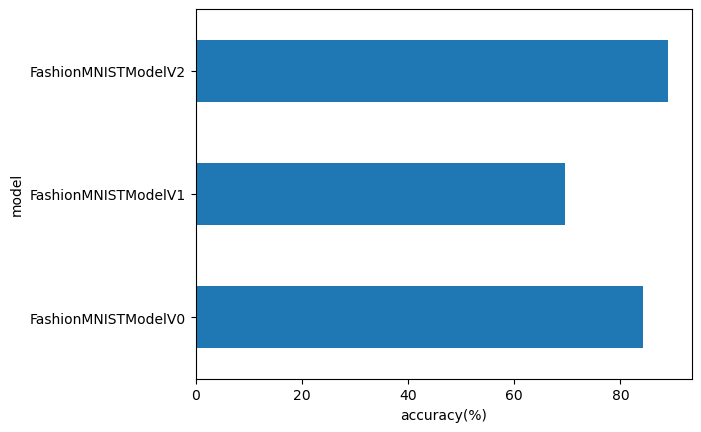

In [48]:
compare_results.set_index('model_name')['model_acc'].plot(kind='barh')
plt.xlabel('accuracy(%)')
plt.ylabel('model')

In [49]:
def make_predictions(model:torch.nn.Module, data:list): #device:torch.device=device
    pred_probs=[]
    #model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample=torch.unsqueeze(sample, dim=0) #.to(device)
            pred_logit=model(sample) #forward pass(model outputs raw logits)
            #get prediction probability(logit->prediction probability)
            pred_prob=torch.softmax(pred_logit.squeeze(), dim=0)
            #get pred_probs off the gpu for further calculations
            pred_probs.append(pred_prob.cpu())
    #stack the pred_probs to turn list into tensor
    return torch.stack(pred_probs)

In [50]:
import random
#random.seed(1234)
test_samples=[]
test_labels=[]
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'T-shirt/top')

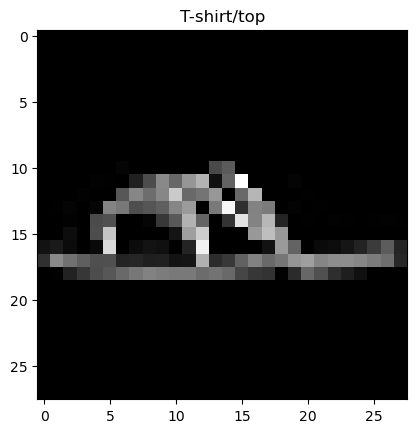

In [51]:
plt.imshow(test_samples[0].squeeze(dim=0), cmap='gray')
plt.title(class_names[label])

In [52]:
pred_probs=make_predictions(model=model_2, data=test_samples)
pred_probs[:2]

tensor([[4.5490e-07, 4.6746e-08, 6.1561e-08, 8.9190e-05, 6.1921e-08, 9.9951e-01,
         1.8707e-06, 8.7589e-06, 3.8475e-04, 5.5438e-07],
        [9.6700e-07, 1.7376e-08, 2.1724e-06, 1.4164e-07, 1.5928e-05, 9.9975e-01,
         1.0243e-06, 4.0426e-06, 1.1613e-04, 1.0908e-04]])

In [53]:
pred_classes=pred_probs.argmax(dim=1)
pred_classes

tensor([5, 5, 2, 4, 9, 6, 5, 8, 0])

In [54]:
test_labels

[5, 5, 2, 4, 9, 6, 5, 8, 0]

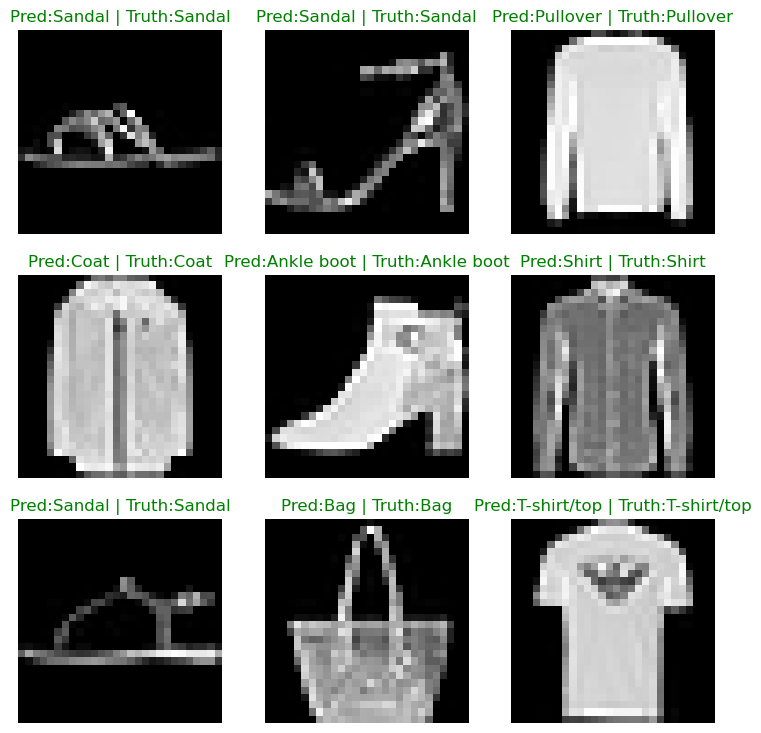

In [55]:
plt.figure(figsize=(9,9))
nrows=3
ncols=3
for i, sample in enumerate(test_samples):
    plt.subplot(nrows, ncols, i+1) #create subplot
    plt.imshow(sample.squeeze(), cmap='gray') #plot the target image
    pred_label=class_names[pred_classes[i]] #find the prediction in text form(e.g., 'Sandal')
    truth_label=class_names[test_labels[i]] #get the truth label in text form
    title_text=f'Pred:{pred_label} | Truth:{truth_label}'
    if pred_label==truth_label:
        plt.title(title_text, c='g') #green text if prediction is same as truth
    else:
        plt.title(title_text, c='r') #red text if prediction is diff from truth
    plt.axis('off')

In [56]:
from tqdm.auto import tqdm
y_preds=[]
model_2.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc='Making predictions'):
        y_logit=model_2(X) #doing forward pass
        #to turn predictions from logits -> prediction probabilities -> prediction labels
        y_pred=torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1) 
        y_preds.append(y_pred.cpu()) #put prediction on cpu for evaluation
y_pred_tensor=torch.cat(y_preds) #concatenate list of predictions into a tensor
y_pred_tensor[:10]

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 2, 6, 5, 7])

In [57]:
import torchmetrics
torchmetrics.__version__

'1.4.0.post0'

In [58]:
import mlxtend
mlxtend.__version__

'0.23.1'

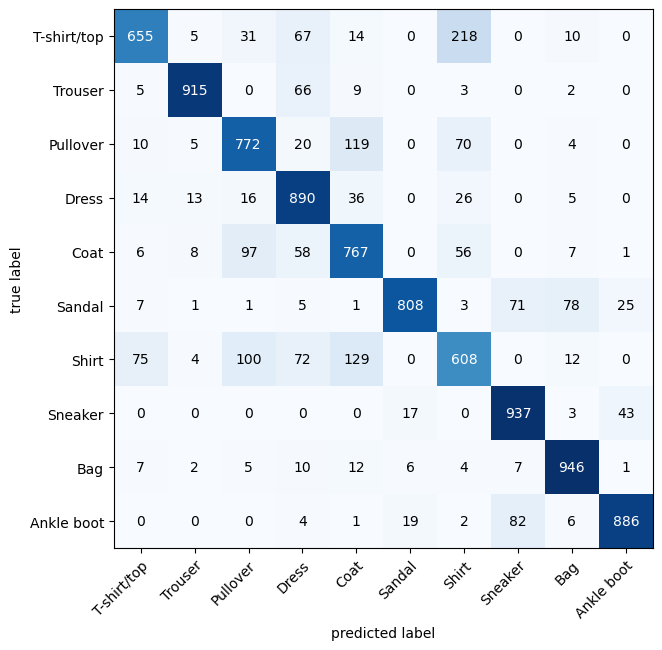

In [59]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix
#setup confusion instance and compare predictions to targets
confMat=ConfusionMatrix(task="multiclass", num_classes=len(class_names))
confMat_tensor=confMat(preds=y_pred_tensor, target=test_data.targets)
#plot the confusion matrix
fig, ax=plot_confusion_matrix(conf_mat=confMat_tensor.numpy(), class_names=class_names, figsize=(10,7))

**Save and load best performing model**

In [60]:
from pathlib import Path
#create model directory path
modelPath=Path('models')
modelPath.mkdir(parents=True, exist_ok=True)
#create model save
modelName='PyTorch_computerVision_model_2.pth'
modelSavePath=modelPath/modelName
#save the model state dict
print(f'Saving model to:{modelSavePath}')
torch.save(obj=model_2.state_dict(), f=modelSavePath)

Saving model to:models/PyTorch_computerVision_model_2.pth


In [61]:
torch.manual_seed(1234) #create a new instance
loaded_model_2=FashionMNISTModelV2(input_shape=1, hidden_units=10, output_shape=len(class_names))
loaded_model_2.load_state_dict(torch.load(f=modelSavePath, weights_only=True)) #load in the save state_dict()
loaded_model_2#.to(device) #send the model to target device

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [62]:
torch.manual_seed(1234)
loaded_model_2_results=eval_model(model=loaded_model_2, data_loader=test_dataloader, loss_fn=loss_fn, 
                                  accuracy_fn=accuracy_fn)
loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.30347639322280884,
 'model_acc': 88.92771565495208}

In [63]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.30347639322280884,
 'model_acc': 88.92771565495208}

In [64]:
#check if model results are close to each other
torch.isclose(torch.tensor(model_2_results['model_loss']), torch.tensor(loaded_model_2_results['model_loss']))
              #atol=1e-04

tensor(True)